<a href="https://colab.research.google.com/github/wonsub1332/DataMiningPython/blob/main/Iris%EC%9D%98_%EC%A2%85%EB%A5%98_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris의 종류 분류

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2022)

## 1.Data

### 1.1 Data Load

In [ ]:
from sklearn.datasets import load_iris
iris= load_iris()

데이터에서 사용되는 변수는 암술과 수술의 길이와 넓이


*   sepal length(cm)
*   sepal width(cm)
*   petal length(cm)
*   petal width(cm)


In [ ]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

정답은 iris 꽃의 종류

In [ ]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
data,target = iris["data"],iris["target"]

In [ ]:
target.shape

(150,)

### 1.2 데이터 EDA

In [ ]:
pd.DataFrame(data,columns=iris["feature_names"])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
pd.DataFrame(data,columns=iris["feature_names"]).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
pd.Series(target).value_counts()

0    50
1    50
2    50
dtype: int64

### 1.3 Data split

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target,train_size=0.7,random_state=2022)

In [ ]:
print("train data 개수:",len(train_data))
print("test data 개수:", len(test_data))

train data 개수: 105
test data 개수: 45


In [ ]:
pd.Series(train_target).value_counts()

0    36
1    35
2    34
dtype: int64

In [ ]:
pd.Series(test_target).value_counts()

2    16
1    15
0    14
dtype: int64

위의 데이터 셋의 분포가 동등하지 않다

그래서 
```
stratify=target
```
를 추가한다


In [ ]:
train_data,test_data,train_target,test_target=train_test_split(data, target,train_size=0.7,random_state=2022,stratify=target)

In [ ]:
pd.Series(train_target).value_counts()

1    35
0    35
2    35
dtype: int64

In [ ]:
pd.Series(test_target).value_counts()

2    15
0    15
1    15
dtype: int64

## 2.Multiclass

In [ ]:
from sklearn.linear_model import LogisticRegression

시각화를 위해서 Sepal lengh와 Sepal width만 사용
4개를 모두 사용하면 4차원이기 때문에 시각화를 할수 없다.

In [ ]:
x= train_data[:,:2]

In [ ]:
x[0]

array([6.4, 2.9])

Text(0, 0.5, 'Sepal width')

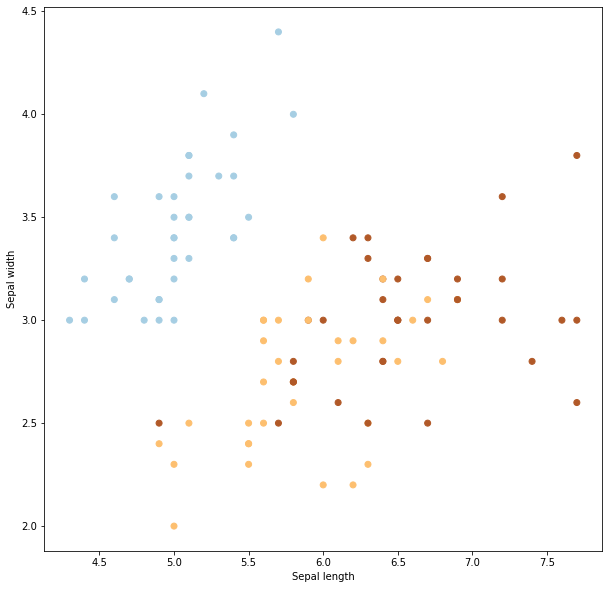

In [ ]:
plt.figure(figsize=(10,10))  ##그래프 선언
plt.scatter(x[:,0],x[:,1], c=train_target , cmap=plt.cm.Paired) ##그래프 그리기
plt.xlabel('Sepal length') ## 그래프 속성
plt.ylabel('Sepal width')
#plt.xlim(x[:,0].min()-0.5,x[:,0].max()+0.5)
#plt.ylim(x[:,1].min()-0.5,x[:,1].max()+0.5)

### 2.1 One vs Rest